## first we initialize the problem, we have 100 points that are plotted in the form of function f + noise
## set the context, what are x and y? some sort of weakly-correlated data

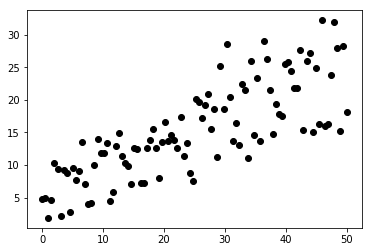

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random as random
%matplotlib inline

f = lambda x: x/4+1

#define the paramters for the plot
a,b = 0,50
npoints = 100

x = np.linspace(a,b,npoints)
y = np.zeros(npoints)
rand = 1
for i in range(npoints):
    if i % 50 == 0:
        rand = rand + 10
    y[i] = f(x[i]) + random.uniform(0,rand)

plt.plot(x,y, 'ko', label='noisy data')
plt.show()

## in the next cell we try to fit a line to the data via gradient descent, i.e., updating parameters that best fit the above data.

In [2]:
def update_w_and_b(x,y,w,b,alpha):
    # initialize w and b as zero
    dl_dw = 0.0 
    dl_db = 0.0
    n = len(x)
    
    # obtain gradients
    for i in range(n):
        dl_dw += -2*x[i]*(y[i]-(w*x[i]+b))
        dl_db += -2*(y[i]-(w*x[i]+b))
    
    # update weights and bias
    w = w - (1/float(n))*alpha*dl_dw
    b = b - (1/float(n))*alpha*dl_db
    
    return w, b

def avg_loss(x,y,w,b): # we want to minimize this loss
    n = len(x)
    total_err = 0.0
    for i in range(n):
        total_err += (y[i]-(w*x[i]+b))**2
    return(total_err/float(n))

def line(x,w,b):
    return(w*x+b)

def train(x,y,w,b,alpha,epochs):
    for epoch in range(epochs+1):
        w,b = update_w_and_b(x,y,w,b,alpha)
        
        if epoch % 5000 == 0:
            print('epoch: %s, loss: %s' %(epoch,avg_loss(x,y,w,b))) 
            plt.plot(x,y, 'ko', label='noisy data')
            plt.plot(x,line(x,w,b))
            plt.show()
            
    return w, b

epoch: 0, loss: 146.65890195738876


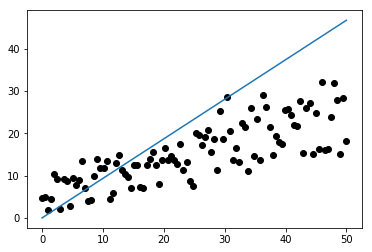

epoch: 5000, loss: 19.612545295192625


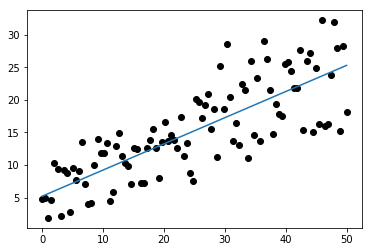

epoch: 10000, loss: 19.562332876087943


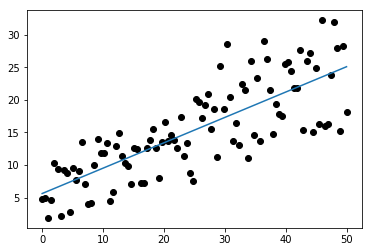

epoch: 15000, loss: 19.56201809606448


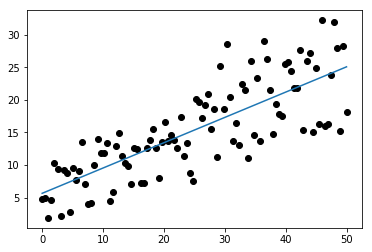

In [3]:
w,b = train(x,y,0,0,0.001,15000)

## It doesn't take very long for the best parameters to be determined. The best we can do is a loss of 22 since the line we fit isn't the best.